In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6530221400919914126
 xla_global_id: -1]

In [ ]:
import platform
platform.platform()

'Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic'

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!cat /proc/meminfo

MemTotal:       13298580 kB
MemFree:        10631396 kB
MemAvailable:   12305752 kB
Buffers:          106016 kB
Cached:          1709284 kB
SwapCached:            0 kB
Active:          1161848 kB
Inactive:        1311768 kB
Active(anon):     599440 kB
Inactive(anon):      468 kB
Active(file):     562408 kB
Inactive(file):  1311300 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               976 kB
Writeback:             0 kB
AnonPages:        658308 kB
Mapped:           465656 kB
Shmem:              1196 kB
KReclaimable:      84196 kB
Slab:             127316 kB
SReclaimable:      84196 kB
SUnreclaim:        43120 kB
KernelStack:        5156 kB
PageTables:         8564 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6649288 kB
Committed_AS:    3362936 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        7508 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!python --version

Python 3.7.13


In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tc1_FCFS.txt to tc1_FCFS.txt
Saving tc1_PPRIORITY.txt to tc1_PPRIORITY.txt
Saving tc1_PRIORITY.txt to tc1_PRIORITY.txt
Saving tc1_PRR.txt to tc1_PRR.txt
Saving tc1_RR.txt to tc1_RR.txt
Saving tc1_SJF.txt to tc1_SJF.txt
Saving tc1_SRTF.txt to tc1_SRTF.txt


In [96]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

algorithm_list = ["FCFS", "SJF", "SRTF", "RR", "PRIORITY", "PPRIORITY", "PRR"]
filename = input()
read_file = [filename + "_" + x + ".txt" for x in algorithm_list]

result_FCFS = pd.read_table(read_file[0], sep = " ")
print(result_FCFS)
result_SJF = pd.read_table(read_file[1], sep = " ")
print(result_SJF)
result_SRTF = pd.read_table(read_file[2], sep = " ")
print(result_SRTF)
result_RR = pd.read_table(read_file[3], sep = " ")
print(result_RR)
result_PRIORITY = pd.read_table(read_file[4], sep = " ")
print(result_PRIORITY)
result_PPRIORITY = pd.read_table(read_file[5], sep = " ")
print(result_PPRIORITY)
result_PRR = pd.read_table(read_file[6], sep = " ")
print(result_PRR)

tc1
    S   E PROCESS  Unnamed: 3
0   0   4      P1         NaN
1   4   5      P2         NaN
2   5  10      P0         NaN
3  10  17      P4         NaN
4  17  20      P3         NaN
5  20  22      P5         NaN
    S   E PROCESS  Unnamed: 3
0   0   4      P1         NaN
1   4   5      P2         NaN
2   5   8      P3         NaN
3   8  10      P5         NaN
4  10  15      P0         NaN
5  15  22      P4         NaN
    S   E PROCESS  Unnamed: 3
0   0   1      P1         NaN
1   1   2      P2         NaN
2   2   5      P1         NaN
3   5   8      P3         NaN
4   8  10      P5         NaN
5  10  15      P0         NaN
6  15  22      P4         NaN
     S   E PROCESS  Unnamed: 3
0    0   2      P1         NaN
1    2   3      P2         NaN
2    3   5      P0         NaN
3    5   7      P4         NaN
4    7   9      P3         NaN
5    9  11      P5         NaN
6   11  13      P1         NaN
7   13  15      P0         NaN
8   15  17      P4         NaN
9   17  18      P3        

In [ ]:
"""
for i in range (0, len(result_FCFS)):
  print(result_FCFS.loc[i])

result_FCFS["PROCESS"].unique()

nprocess = len(result_FCFS["PROCESS"].unique())
process = pd.DataFrame(result_FCFS["PROCESS"].unique())
#color = list(np.random.choice(range(256), 3))
color = np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)/255
color = np.hstack([color, np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)])
color

process = result_FCFS["PROCESS"].unique()
nprocess = len(result_FCFS["PROCESS"].unique())

color = np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)

processcolor = {x: y for x, y in zip(process, color)}
print(processcolor)
print(result_FCFS.iloc[0]["PROCESS"])
processcolor.get(result_FCFS.iloc[0]["PROCESS"])
processcolor.get(result_FCFS.iloc[0]["PROCESS"]).tolist()
"""
process = result_FCFS["PROCESS"].unique()
nprocess = len(result_FCFS["PROCESS"].unique())
color = np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)

processcolor = {x: y for x, y in zip(process, color)}
print(processcolor.get(result_SJF.iloc[0]["PROCESS"]))
print(result_SJF.iloc[0])

[220 253 165]
S               0
E               4
PROCESS        P1
Unnamed: 3    NaN
Name: 0, dtype: object


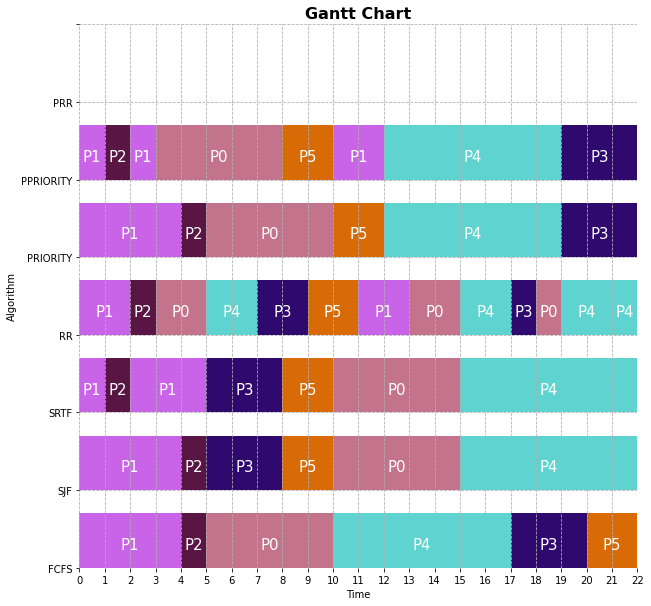

In [148]:
fig, gnt = plt.subplots()

plt.rcParams['figure.figsize'] = (10,10)
plt.title("Gantt Chart", fontsize= 16, fontweight = 'bold')


gnt.set_xlabel("Time")
gnt.set_ylabel("Algorithm")
plt.xlim([0, result_FCFS.iloc[len(result_FCFS)-1]["E"]])
plt.ylim([0, 5*7])
plt.xticks(range(result_FCFS.iloc[len(result_FCFS)-1]["E"] + 1))
gnt.set_yticklabels(algorithm_list)
plt.box(False)

process = result_FCFS["PROCESS"].unique()
nprocess = len(result_FCFS["PROCESS"].unique())

color = np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)/255

processcolor = {x: y for x, y in zip(process, color)}

gnt.grid(True, linestyle='--')
width = 3.5
for i in range (0, len(result_FCFS)):
  #print([(result_FCFS.iloc[i]["S"], result_FCFS.iloc[i]["E"]), result_FCFS.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_FCFS.iloc[i]["S"], result_FCFS.iloc[i]["E"])], (0, width), facecolors = processcolor.get(result_FCFS.iloc[i]["PROCESS"]).tolist())
  #processcolor.get(result_FCFS.iloc[i]["PROCESS"])
  #print(result_FCFS.loc[i])
  gnt.annotate("%s"%(result_FCFS.iloc[i]["PROCESS"]), xy=((result_FCFS.iloc[i]["S"] + result_FCFS.iloc[i]["E"])/2, 0+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)


for i in range (0, len(result_SJF)):
  #print([(result_SJF.iloc[i]["S"], result_SJF.iloc[i]["E"]), result_SJF.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_SJF.iloc[i]["S"], result_SJF.iloc[i]["E"])], (5, width), facecolors = processcolor.get(result_SJF.iloc[i]["PROCESS"]).tolist())
  gnt.annotate("%s"%(result_SJF.iloc[i]["PROCESS"]), xy=((result_SJF.iloc[i]["S"] + result_SJF.iloc[i]["E"])/2, 5+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)

for i in range (0, len(result_SRTF)):
  #print([(result_SRTF.iloc[i]["S"], result_SRTF.iloc[i]["E"]), result_SRTF.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_SRTF.iloc[i]["S"], result_SRTF.iloc[i]["E"])], (10, width), facecolors = processcolor.get(result_SRTF.iloc[i]["PROCESS"]).tolist())
  gnt.annotate("%s"%(result_SRTF.iloc[i]["PROCESS"]), xy=((result_SRTF.iloc[i]["S"] + result_SRTF.iloc[i]["E"])/2, 10+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)

for i in range (0, len(result_RR)):
  #print([(result_RR.iloc[i]["S"], result_RR.iloc[i]["E"]), result_RR.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_RR.iloc[i]["S"], result_RR.iloc[i]["E"])], (15, width), facecolors = processcolor.get(result_RR.iloc[i]["PROCESS"]).tolist())
  gnt.annotate("%s"%(result_RR.iloc[i]["PROCESS"]), xy=((result_RR.iloc[i]["S"] + result_RR.iloc[i]["E"])/2, 15+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)

for i in range (0, len(result_PRIORITY)):
  #print([(result_PRIORITY.iloc[i]["S"], result_PRIORITY.iloc[i]["E"]), result_PRIORITY.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_PRIORITY.iloc[i]["S"], result_PRIORITY.iloc[i]["E"])], (20, width), facecolors = processcolor.get(result_PRIORITY.iloc[i]["PROCESS"]).tolist())
  gnt.annotate("%s"%(result_PRIORITY.iloc[i]["PROCESS"]), xy=((result_PRIORITY.iloc[i]["S"] + result_PRIORITY.iloc[i]["E"])/2, 20+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)

for i in range (0, len(result_PPRIORITY)):
  #print([(result_PPRIORITY.iloc[i]["S"], result_PPRIORITY.iloc[i]["E"]), result_PPRIORITY.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_PPRIORITY.iloc[i]["S"], result_PPRIORITY.iloc[i]["E"])], (25, width), facecolors = processcolor.get(result_PPRIORITY.iloc[i]["PROCESS"]).tolist())
  gnt.annotate("%s"%(result_PPRIORITY.iloc[i]["PROCESS"]), xy=((result_PPRIORITY.iloc[i]["S"] + result_PPRIORITY.iloc[i]["E"])/2, 25+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)

for i in range (0, len(result_PRR)):
  #print([(result_PRR.iloc[i]["S"], result_PRR.iloc[i]["E"]), result_PRR.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_PRR.iloc[i]["S"], result_PRR.iloc[i]["E"])], (30, width), facecolors = processcolor.get(result_PRR.iloc[i]["PROCESS"]).tolist())
  gnt.annotate("%s"%(result_PRR.iloc[i]["PROCESS"]), xy=((result_PRR.iloc[i]["S"] + result_PRR.iloc[i]["E"])/2, 30+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)

plt.savefig(filename+"_GanttChart.png")

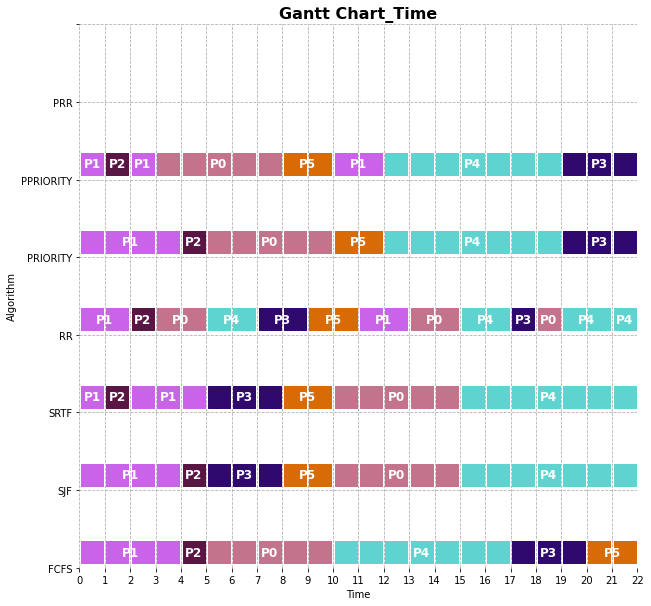

In [252]:
from matplotlib.animation import FuncAnimation
timeslice = 5/result_FCFS.iloc[len(result_FCFS)-1]["E"]
fig, gnt = plt.subplots()

plt.rcParams['figure.figsize'] = (10,10)
plt.title("Gantt Chart_Time", fontsize= 16, fontweight = 'bold')

gnt.set_xlabel("Time")
gnt.set_ylabel("Algorithm")
plt.xlim([0, result_FCFS.iloc[len(result_FCFS)-1]["E"]])
plt.ylim([0, 5*7])
plt.xticks(range(result_FCFS.iloc[len(result_FCFS)-1]["E"] + 1))
gnt.set_yticklabels(algorithm_list)
plt.box(False)
gnt.grid(True, linestyle='--')
width = 3.5

x, y = [], []
line, = plt.plot([], [], 'bo')

for i in range (0, len(result_FCFS)):
  gnt.annotate("%s"%(result_FCFS.iloc[i]["PROCESS"]), xy=((result_FCFS.iloc[i]["S"] + result_FCFS.iloc[i]["E"])/2, 0+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

for i in range (0, len(result_SJF)):
  gnt.annotate("%s"%(result_SJF.iloc[i]["PROCESS"]), xy=((result_SJF.iloc[i]["S"] + result_SJF.iloc[i]["E"])/2, 5+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

for i in range (0, len(result_SRTF)):
  gnt.annotate("%s"%(result_SRTF.iloc[i]["PROCESS"]), xy=((result_SRTF.iloc[i]["S"] + result_SRTF.iloc[i]["E"])/2, 10+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

for i in range (0, len(result_RR)):
  gnt.annotate("%s"%(result_RR.iloc[i]["PROCESS"]), xy=((result_RR.iloc[i]["S"] + result_RR.iloc[i]["E"])/2, 15+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

for i in range (0, len(result_PRIORITY)):
  gnt.annotate("%s"%(result_PRIORITY.iloc[i]["PROCESS"]), xy=((result_PRIORITY.iloc[i]["S"] + result_PRIORITY.iloc[i]["E"])/2, 20+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

for i in range (0, len(result_PPRIORITY)):
  gnt.annotate("%s"%(result_PPRIORITY.iloc[i]["PROCESS"]), xy=((result_PPRIORITY.iloc[i]["S"] + result_PPRIORITY.iloc[i]["E"])/2, 25+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

for i in range (0, len(result_PRR)):
  gnt.annotate("%s"%(result_PRR.iloc[i]["PROCESS"]), xy=((result_PRR.iloc[i]["S"] + result_PRR.iloc[i]["E"])/2, 30+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

def animate(t):
#["FCFS", "SJF", "SRTF", "RR", "PRIORITY", "PPRIORITY", "PRR"]
  x = t+0.5
  y = 1
  index = 0
  for i in range (0, t):
    if result_FCFS.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_FCFS.iloc[index]["PROCESS"]).tolist(),s=500)
  x = t+0.5
  y = 6
  index = 0
  for i in range (0, t):
    if result_SJF.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_SJF.iloc[index]["PROCESS"]).tolist(),s=500)
  x = t+0.5
  y = 11
  index = 0
  for i in range (0, t):
    if result_SRTF.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_SRTF.iloc[index]["PROCESS"]).tolist(),s=500)
  x = t+0.5
  y = 16
  index = 0
  for i in range (0, t):
    if result_RR.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_RR.iloc[index]["PROCESS"]).tolist(),s=500)
  x = t+0.5
  y = 21
  index = 0
  for i in range (0, t):
    if result_PRIORITY.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_PRIORITY.iloc[index]["PROCESS"]).tolist(),s=500)
  x = t+0.5
  y = 26
  index = 0
  for i in range (0, t):
    if result_PPRIORITY.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_PPRIORITY.iloc[index]["PROCESS"]).tolist(),s=500)
  x = t+0.5
  y = 31
  """
  index = 0
  for i in range (0, t):
    if result_PRR.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_PRR.iloc[index]["PROCESS"]).tolist(),s=500)
  """



timeslice = 100/result_FCFS.iloc[len(result_FCFS)-1]["E"]
ani = FuncAnimation(fig=fig, func=animate, frames = np.arange(result_FCFS.iloc[len(result_FCFS)-1]["E"]), interval=timeslice, repeat = False)
animationsave = filename + "_" + "GanttChartAnimation.gif"
ani.save(animationsave, writer='imagemagick')


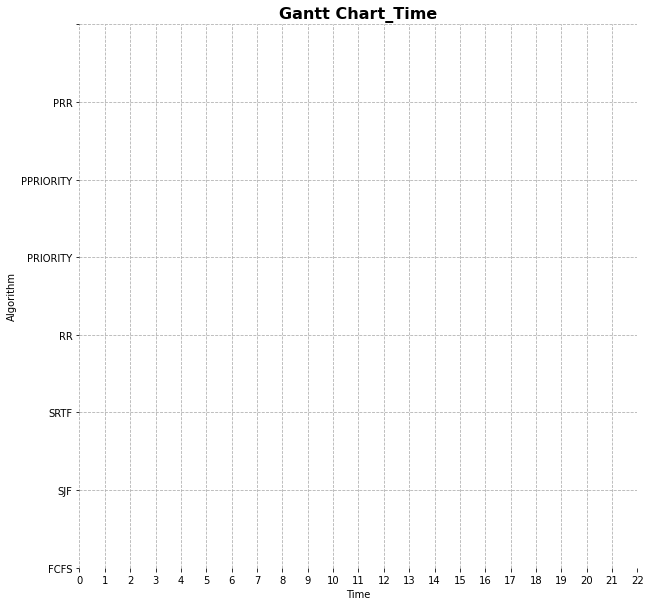

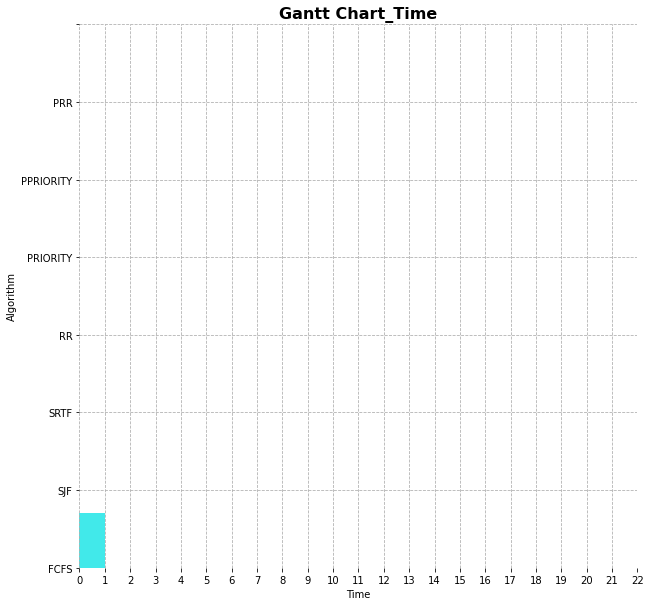

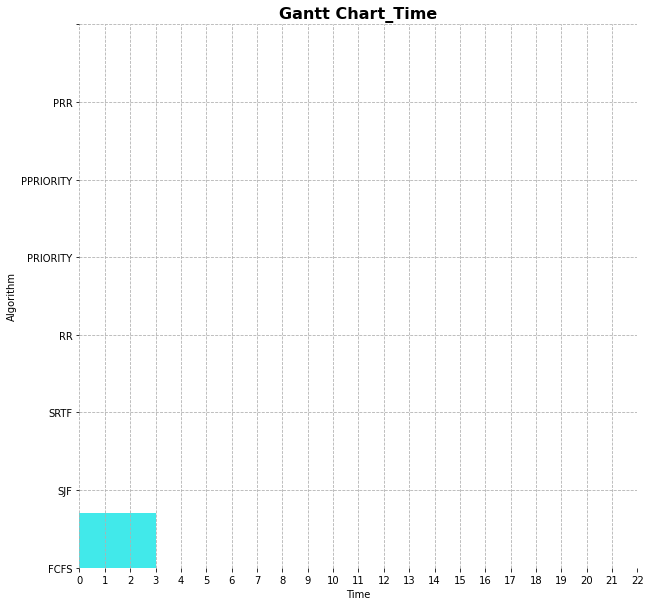

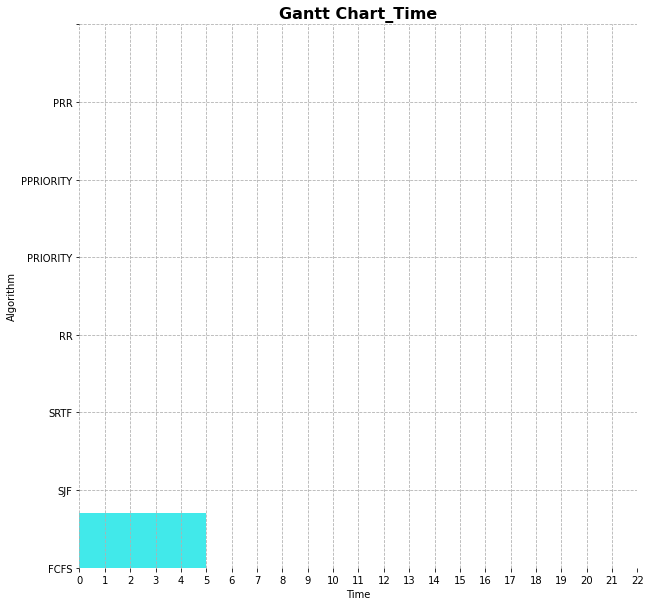

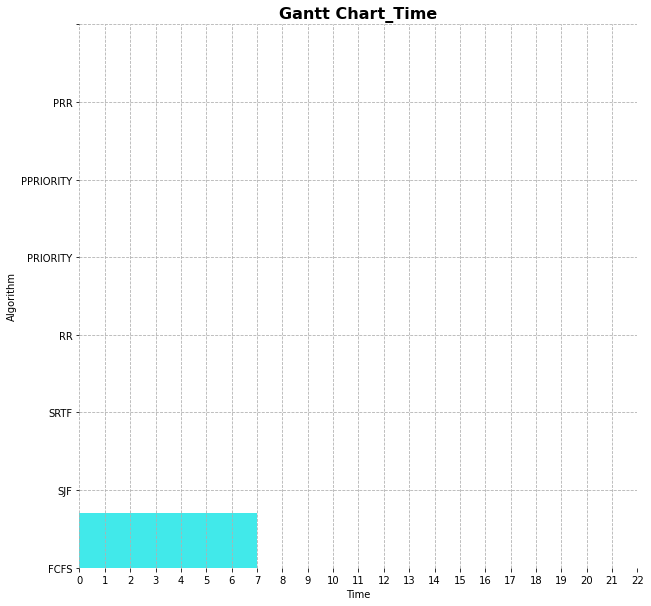

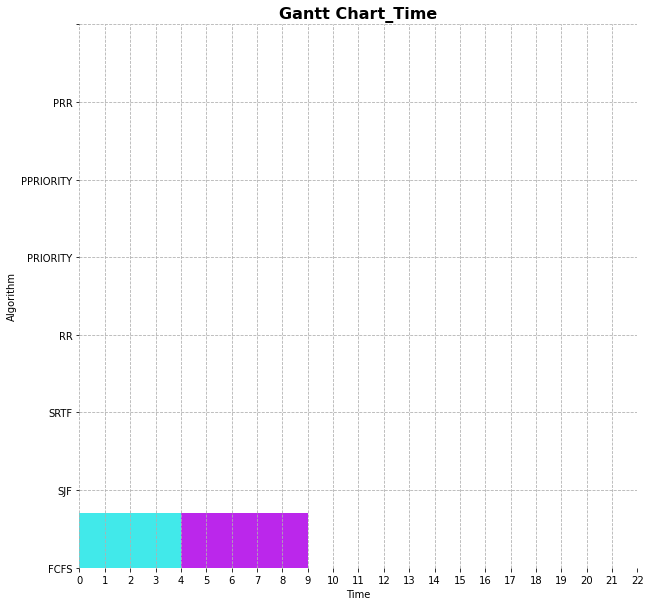

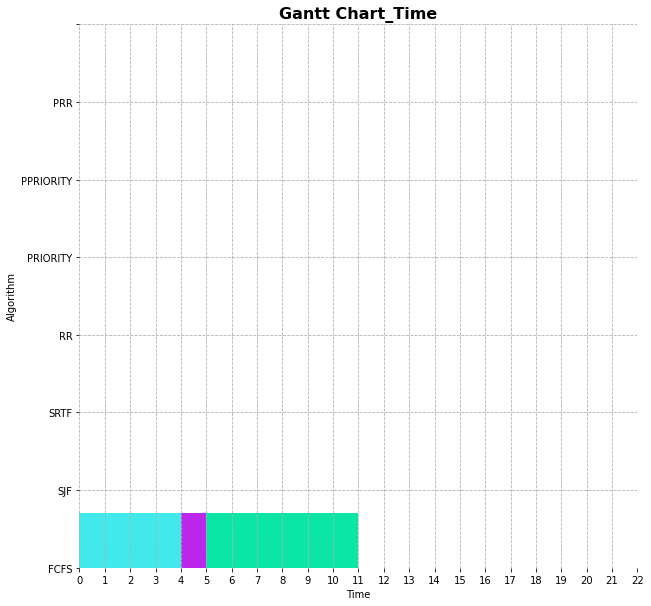

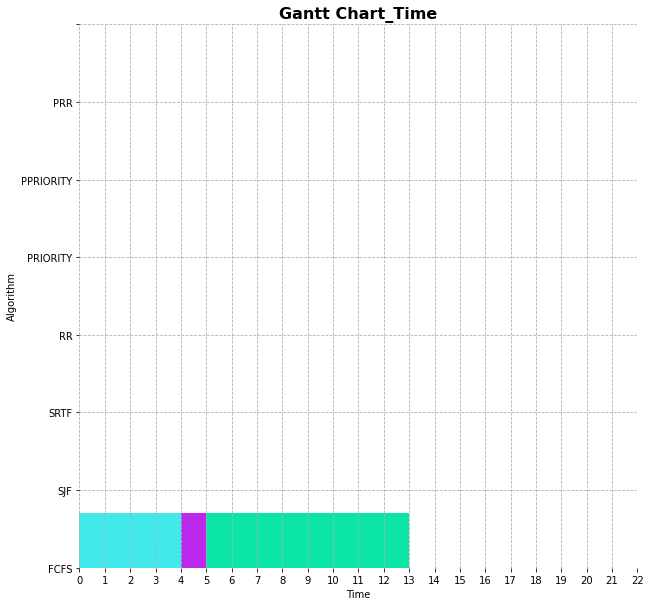

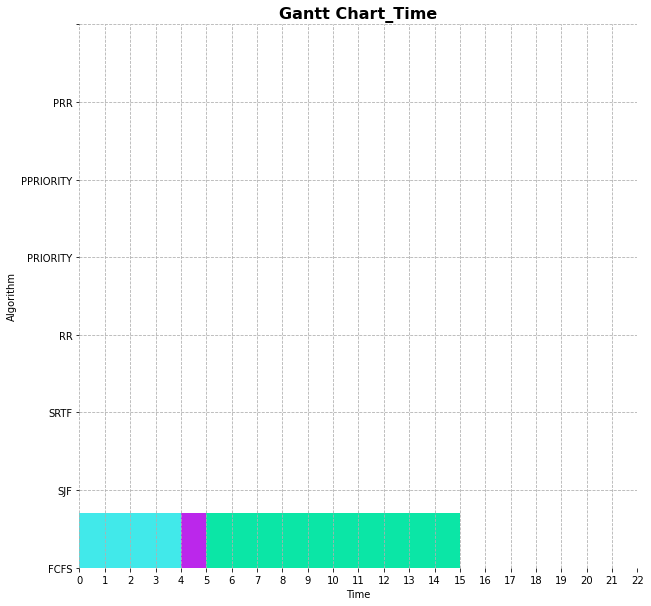

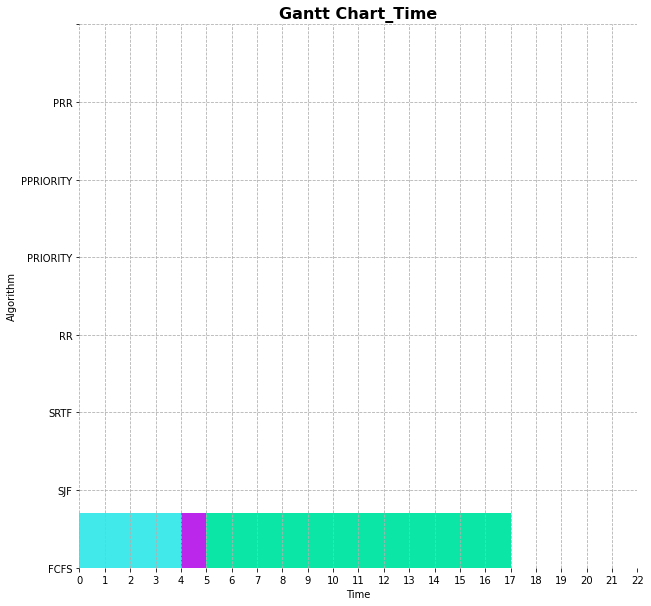

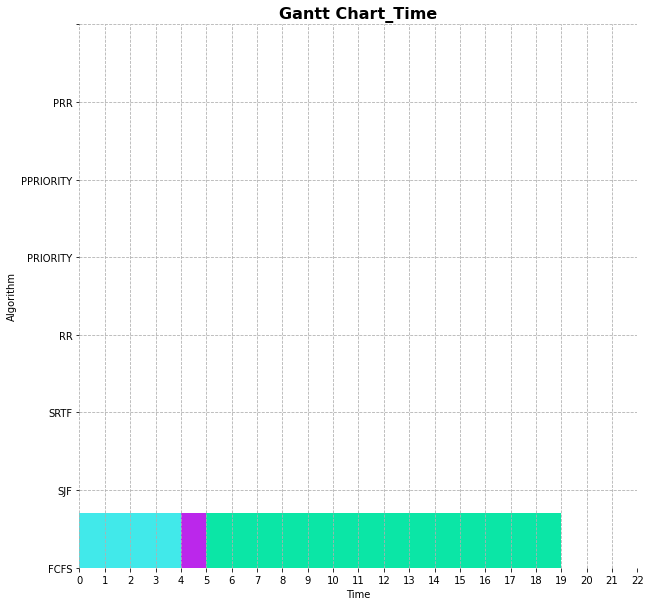

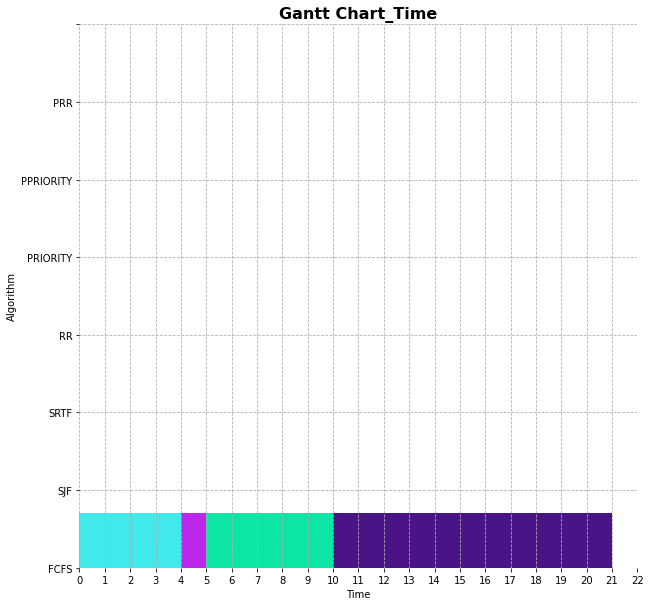

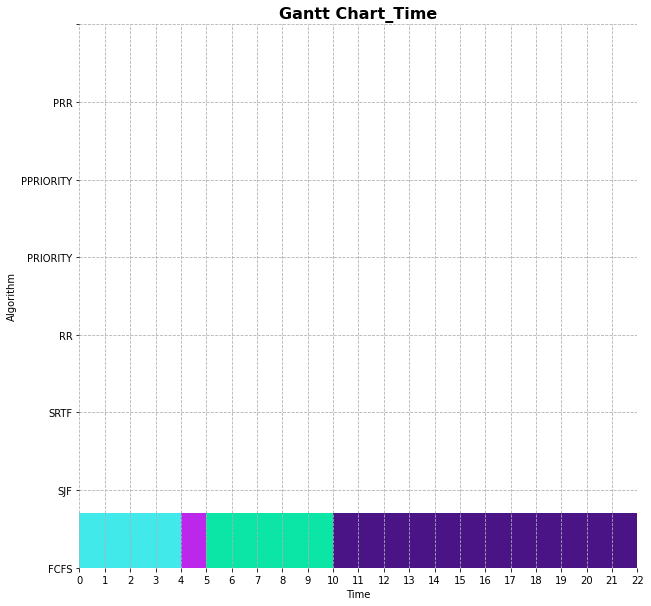

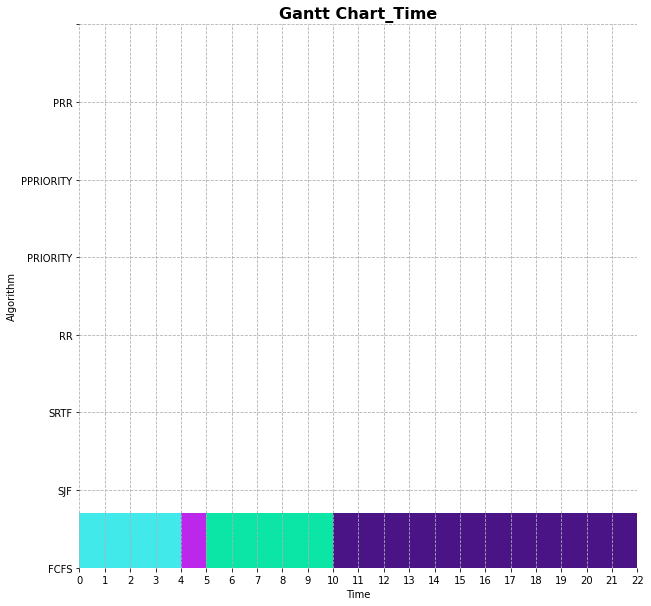

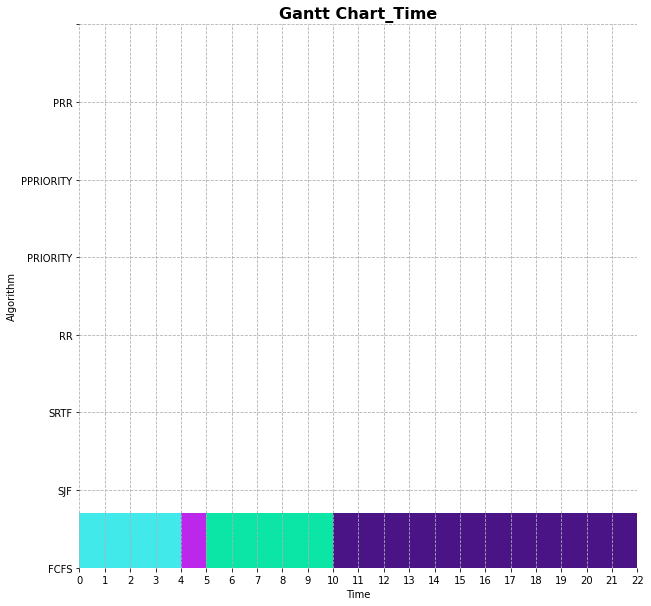

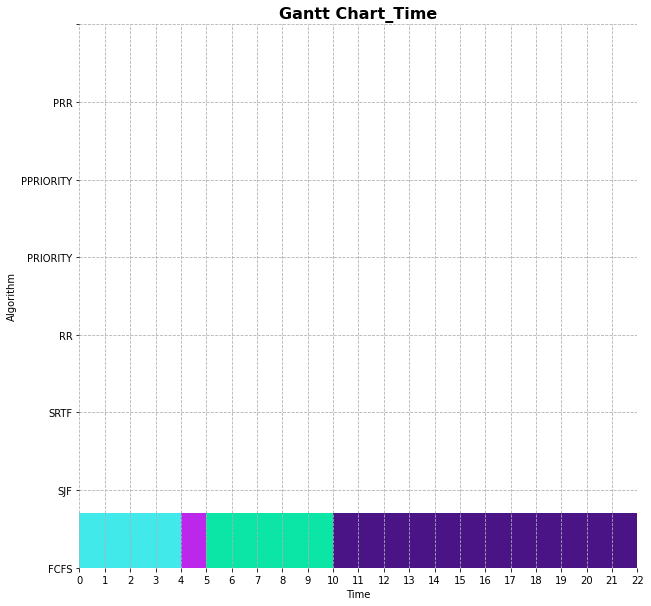

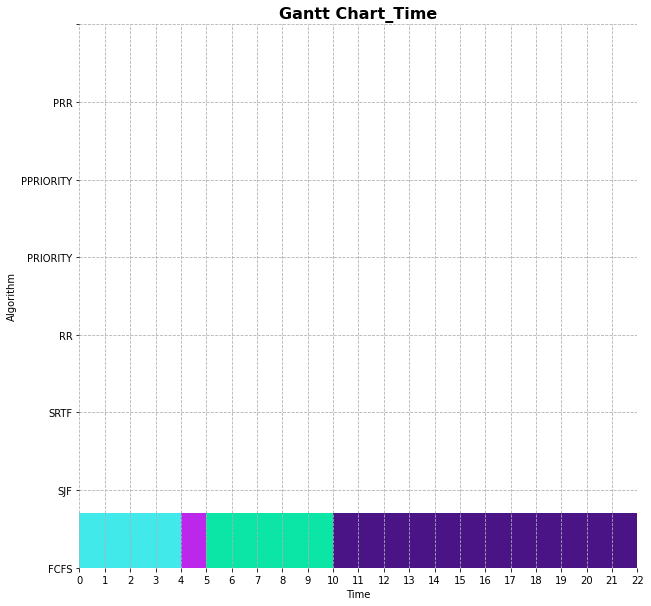

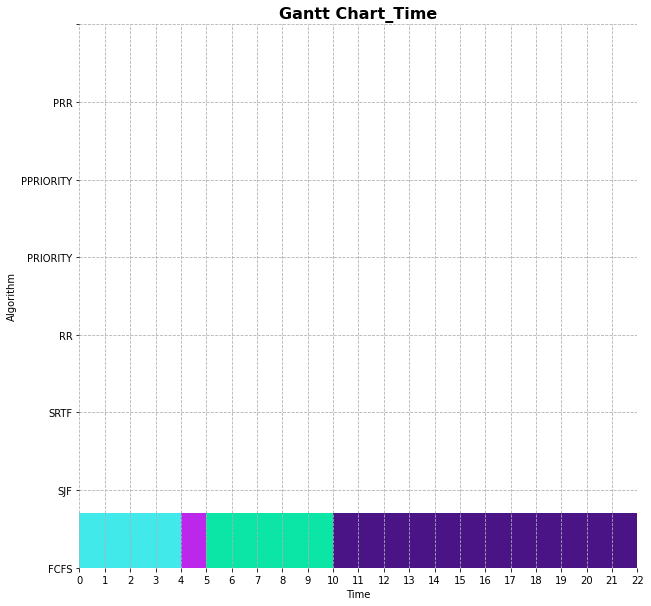

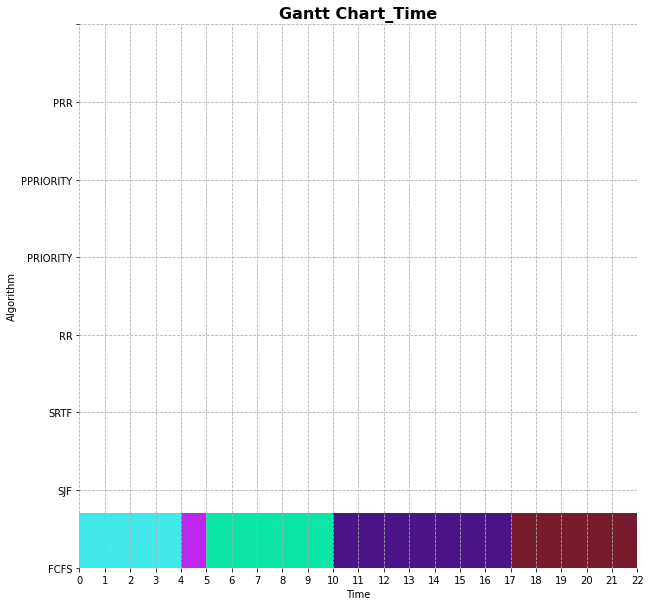

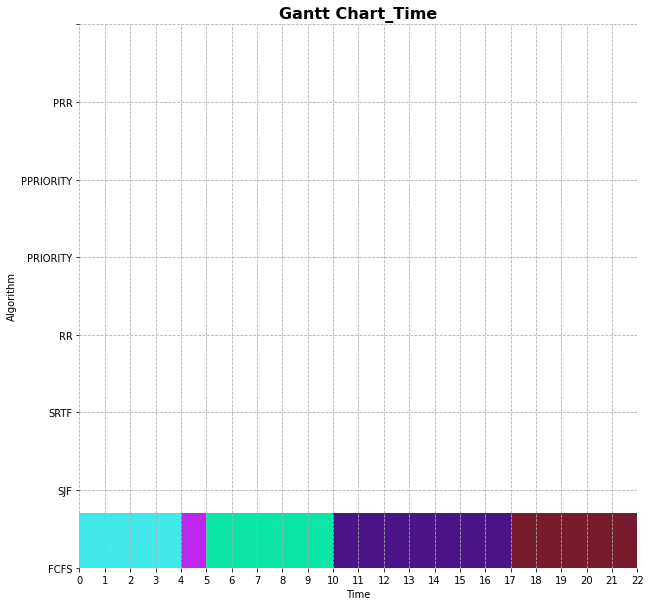

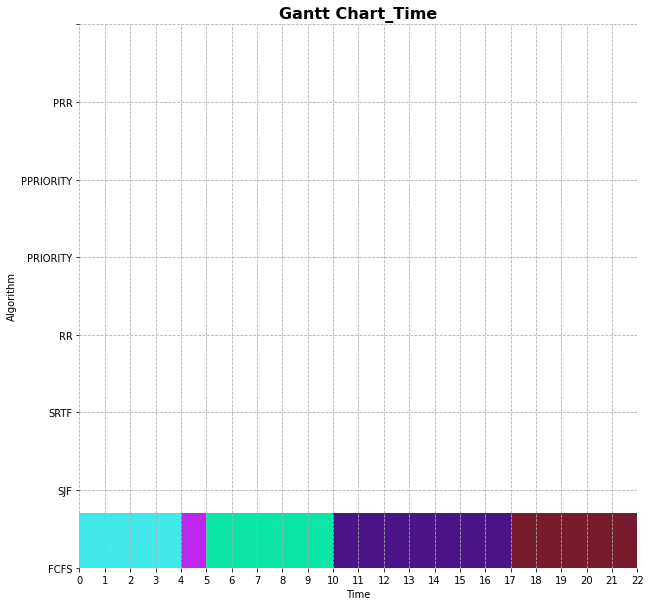

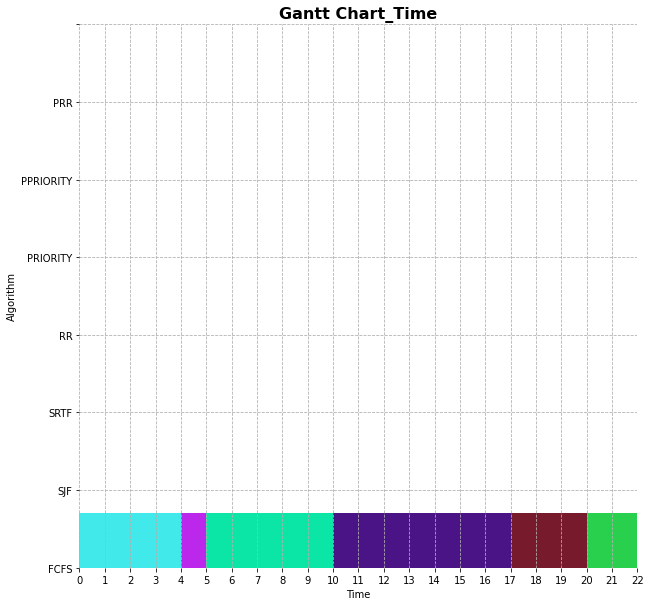

In [143]:
import os
timeslice = 5/result_FCFS.iloc[len(result_FCFS)-1]["E"]
for t in range (0, result_FCFS.iloc[len(result_FCFS)-1]["E"]):
  fig, gnt = plt.subplots()

  plt.rcParams['figure.figsize'] = (10,10)
  plt.title("Gantt Chart_Time", fontsize= 16, fontweight = 'bold')


  gnt.set_xlabel("Time")
  gnt.set_ylabel("Algorithm")
  plt.xlim([0, result_FCFS.iloc[len(result_FCFS)-1]["E"]])
  plt.ylim([0, 5*7])
  plt.xticks(range(result_FCFS.iloc[len(result_FCFS)-1]["E"] + 1))
  gnt.set_yticklabels(algorithm_list)
  plt.box(False)
  gnt.grid(True, linestyle='--')
  width = 3.5
  
  index = 0
  for i in range (0, t):
    #print([(result_FCFS.iloc[i]["S"], result_FCFS.iloc[i]["E"]), result_FCFS.iloc[i]["PROCESS"]])
    #print(i, index)
    gnt.broken_barh([(i, i+1)], (0, width), facecolors = processcolor.get(result_FCFS.iloc[index]["PROCESS"]).tolist())
    if result_FCFS.iloc[index]["E"] == i+1:
      index+=1 
  plt.show()
  time.sleep(timeslice)
  os.system('cls')
  """
  index = 0
  print(t)
  index = 0
  for i in range(0,len(result_FCFS)):
    if result_FCFS.iloc[i]["S"] == t:
      index = i
  gnt.broken_barh([(t, t+1)], (0, width), facecolors = processcolor.get(result_FCFS.iloc[index]["PROCESS"]).tolist())
  """
  """
  x.append(t)
  y.append(0)
  line.set_data(x,y)
  return line,
  """

In [104]:
import time

for i in range(0,5):
    localtime = time.localtime()
    result = time.strftime("%I:%M:%S %p", localtime)
    print(result)
    time.sleep(1)

08:43:49 AM
08:43:50 AM
08:43:51 AM
08:43:52 AM
08:43:53 AM


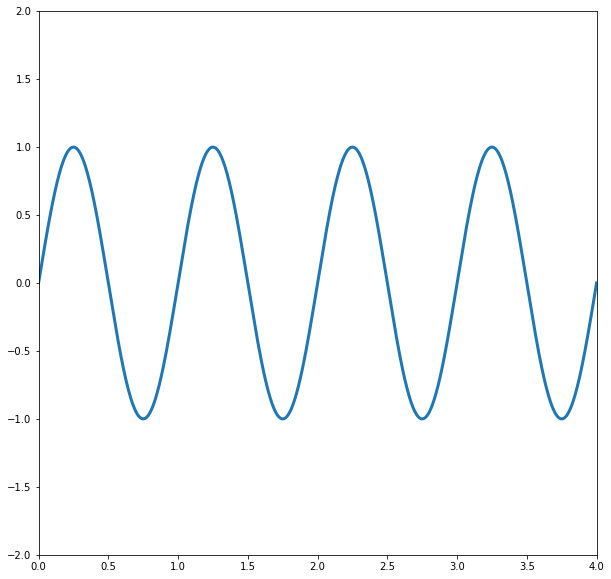

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fo

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)


def animate(i):
  x = np.linspace(0, 4, 1000)
  y = np.sin(2 * np.pi * (x - 0.01 * i))
  line.set_data(x, y)
  return line,


# anim = FuncAnimation(fig, animate, frames=200, interval=50)
anim = FuncAnimation(fig, animate, frames=200, interval=100)

plt.show()
!apt install imagemagick
anim.save("sine_wave_interval_100ms.gif", writer='imagemagick')

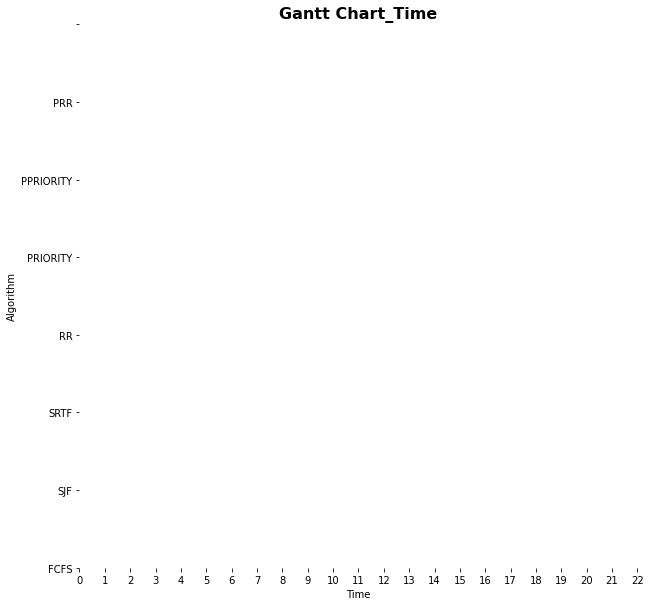

In [118]:

fig, gnt = plt.subplots()

plt.rcParams['figure.figsize'] = (10,10)
plt.title("Gantt Chart_Time", fontsize= 16, fontweight = 'bold')


gnt.set_xlabel("Time")
gnt.set_ylabel("Algorithm")
plt.xlim([0, result_FCFS.iloc[len(result_FCFS)-1]["E"]])
plt.ylim([0, 5*7])
plt.xticks(range(result_FCFS.iloc[len(result_FCFS)-1]["E"] + 1))
gnt.set_yticklabels(algorithm_list)
plt.box(False)


processcolor = {x: y for x, y in zip(process, color)}

#gnt.grid(True)
width = 3.5
result_FCFS

index = 0
for t in range (0, result_FCFS.iloc[len(result_FCFS)-1]["E"]):
  time.sleep(0.4)
  #print([(result_FCFS.iloc[i]["S"], result_FCFS.iloc[i]["E"]), result_FCFS.iloc[i]["PROCESS"]])
  #print(t, index)
  gnt.broken_barh([(t, t+1)], (0, width), facecolors = processcolor.get(result_FCFS.iloc[index]["PROCESS"]).tolist())
  if result_FCFS.iloc[index]["E"] == t+1:
    index+=1 
  
  #processcolor.get(result_FCFS.iloc[i]["PROCESS"])
  #print(result_FCFS.loc[i])

In [ ]:
fig, gnt = plt.subplots()
gnt.set_xlabel("Time")
gnt.set_ylabel("Algorithm")
plt.xlim([0, result_FCFS.iloc[len(result_FCFS)-1]["E"]])
plt.ylim([0, 5*7])
plt.xticks(range(result_FCFS.iloc[len(result_FCFS)-1]["E"] + 1))
gnt.set_yticklabels(algorithm_list)


process = result_FCFS["PROCESS"].unique()
nprocess = len(result_FCFS["PROCESS"].unique())

color = np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)/255

processcolor = {x: y for x, y in zip(process, color)}

for i in range (0, result_FCFS.iloc[len(result_FCFS)-1]["E"]):
  
  gnt.broken_barh([(result_FCFS.iloc[i]["S"], result_FCFS.iloc[i]["E"])], (0, width), facecolors = processcolor.get(result_FCFS.iloc[i]["PROCESS"]).tolist())

In [ ]:
"""
import plotly.figure_factory as ff
print(result_FCFS)
result_FCFS.columns = ["Start","Finish","Task"," "]
fig = ff.create_gantt(result_FCFS)
fig.show()
"""

'\nimport plotly.figure_factory as ff\nprint(result_FCFS)\nresult_FCFS.columns = ["Start","Finish","Task"," "]\nfig = ff.create_gantt(result_FCFS)\nfig.show()\n'

TypeError: ignored

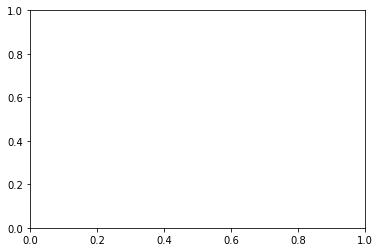

In [ ]:
"""
width = 0.9

nrow = len(result_FCFS)


for i in range(nrow):
  plt.broken_barh([result_FCFS["S"][i], result_FCFS["E"][i]], (i-width, width), color = "b")
"""

In [ ]:
"""
fig = px.timeline(result_FCFS, x_start="S", x_end="E", y="PROCESS")
fig.show()
"""